<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/blob/main/Kaggle_Challenge_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.impute import SimpleImputer
# Read the CSV file using pandas
train_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/test.csv')
sample_submission_df = pd.read_csv('https://raw.githubusercontent.com/7PAM2015-0105-2023-Team1/kaggle_challenge_team_1/main/sample_submission.csv')

# Display the first few rows of the DataFrame
print(train_df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [149]:
# Display the first few rows of the DataFrame
print(test_df.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  


In [150]:
# Display the first few rows of the DataFrame
print(sample_submission_df.head())

  PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False


In [151]:
# checking size of data frame
train_df.shape

(8693, 14)

In [152]:
train_df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [153]:
# checking dtype of all columns
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [154]:
# checking the unique values
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [155]:
# checkink columns separately
train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [156]:
# to check the null values
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [157]:
# adjusting columns
dropped_train_df = train_df.drop(['CryoSleep', 'Cabin', 'VIP', 'Destination', 'Transported'], axis=1)
dropped_train_df.head()

,PassengerId,HomePlanet,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines


<Axes: >

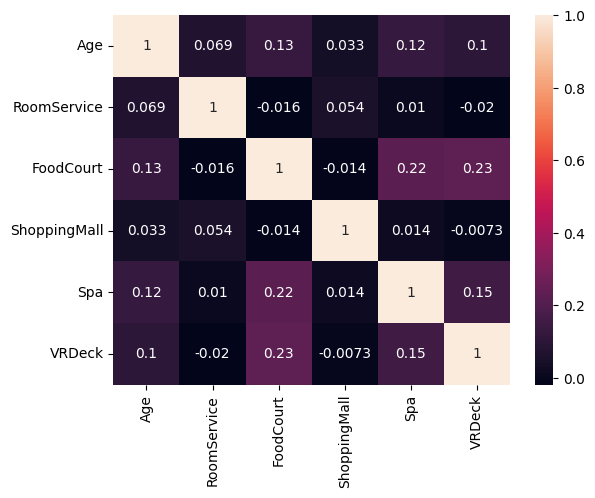

In [158]:
# explaining the corelation matrix
correlation = dropped_train_df.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

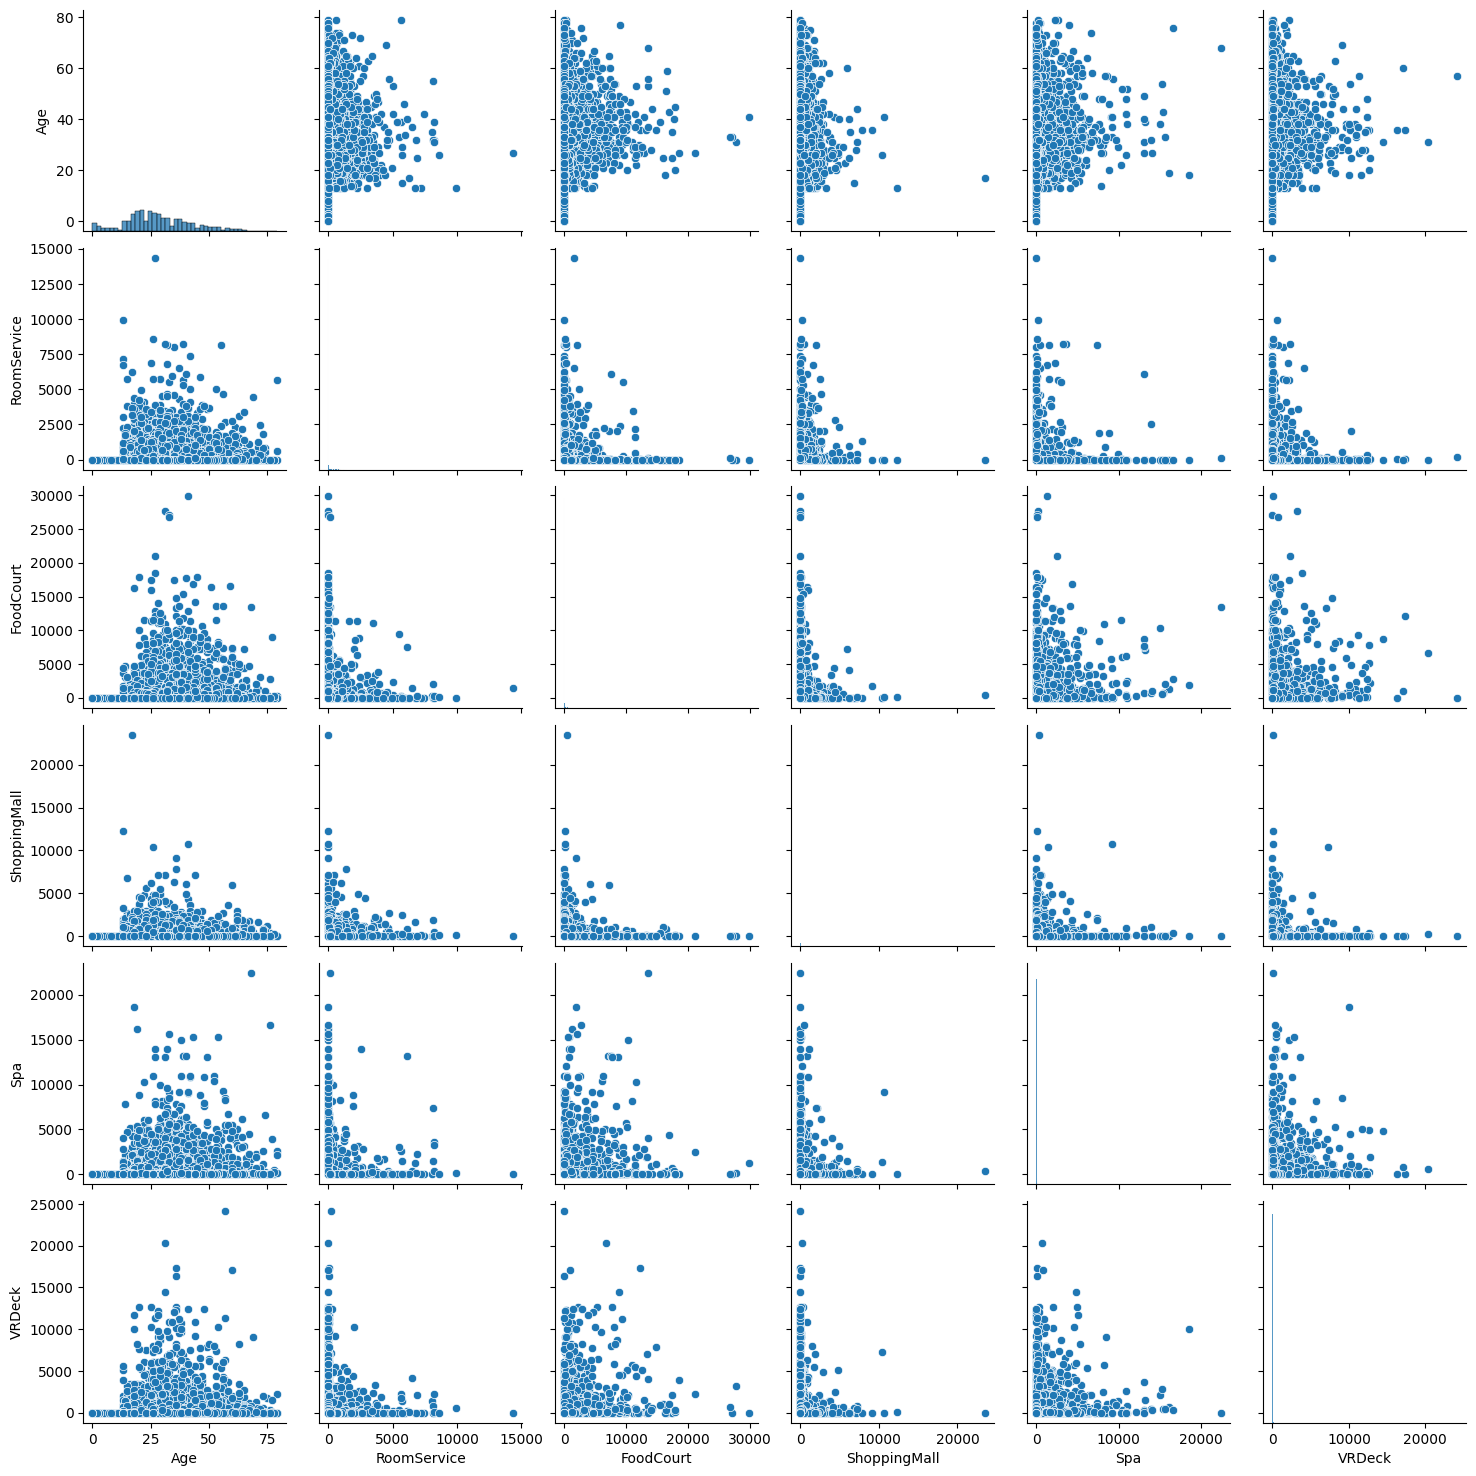

In [159]:
# Explaining the selected columns in terms of pair plots
sns.pairplot(dropped_train_df)

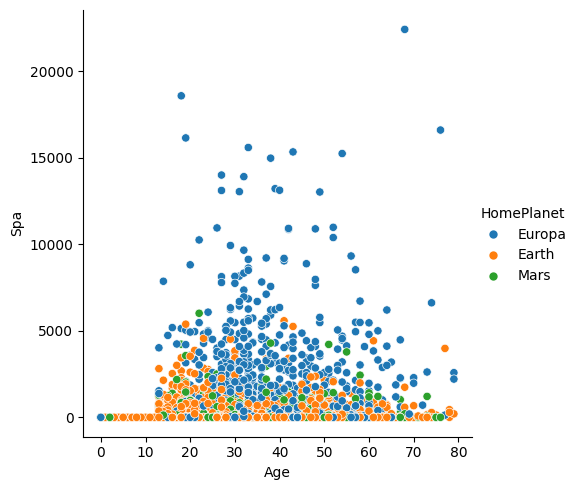

In [160]:
# relplot shows the relation between the variables
sns.relplot(x='Age', y='Spa', hue='HomePlanet', data=train_df)

<Axes: xlabel='Age', ylabel='Count'>

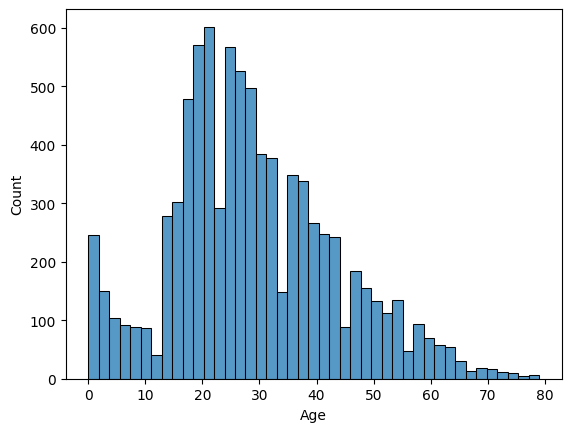

In [161]:
# Histplot visualization
sns.histplot(dropped_train_df['Age'])



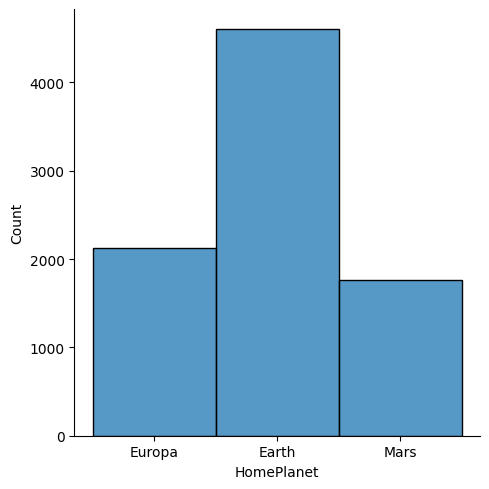

In [162]:
# displot visualization
sns.displot(dropped_train_df['HomePlanet'])

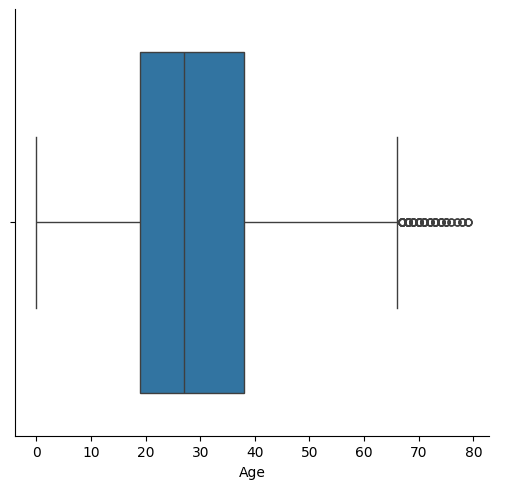

In [163]:
 # Categorical plot
sns.catplot(x='Age', kind='box', data=dropped_train_df)

In [164]:
dropped_test_df = test_df.drop(['CryoSleep', 'Cabin', 'Destination', 'Name', 'VIP'], axis=1)
dropped_test_df.head()


,PassengerId,HomePlanet,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,27.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,19.0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,31.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,38.0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,20.0,10.0,0.0,635.0,0.0,0.0


<Axes: >

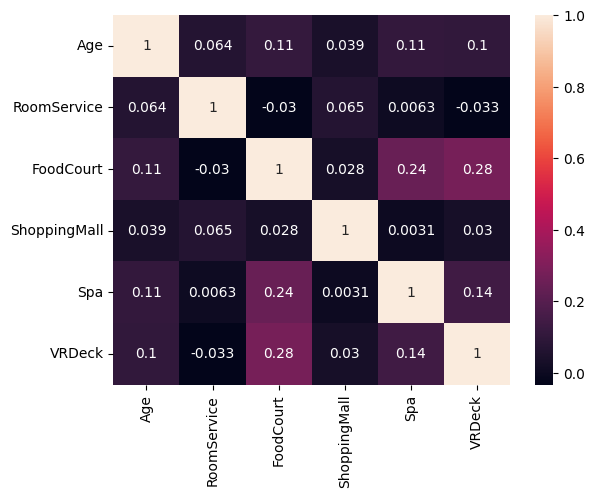

In [165]:
# explaining the corelation matrix
correlation = dropped_test_df.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)


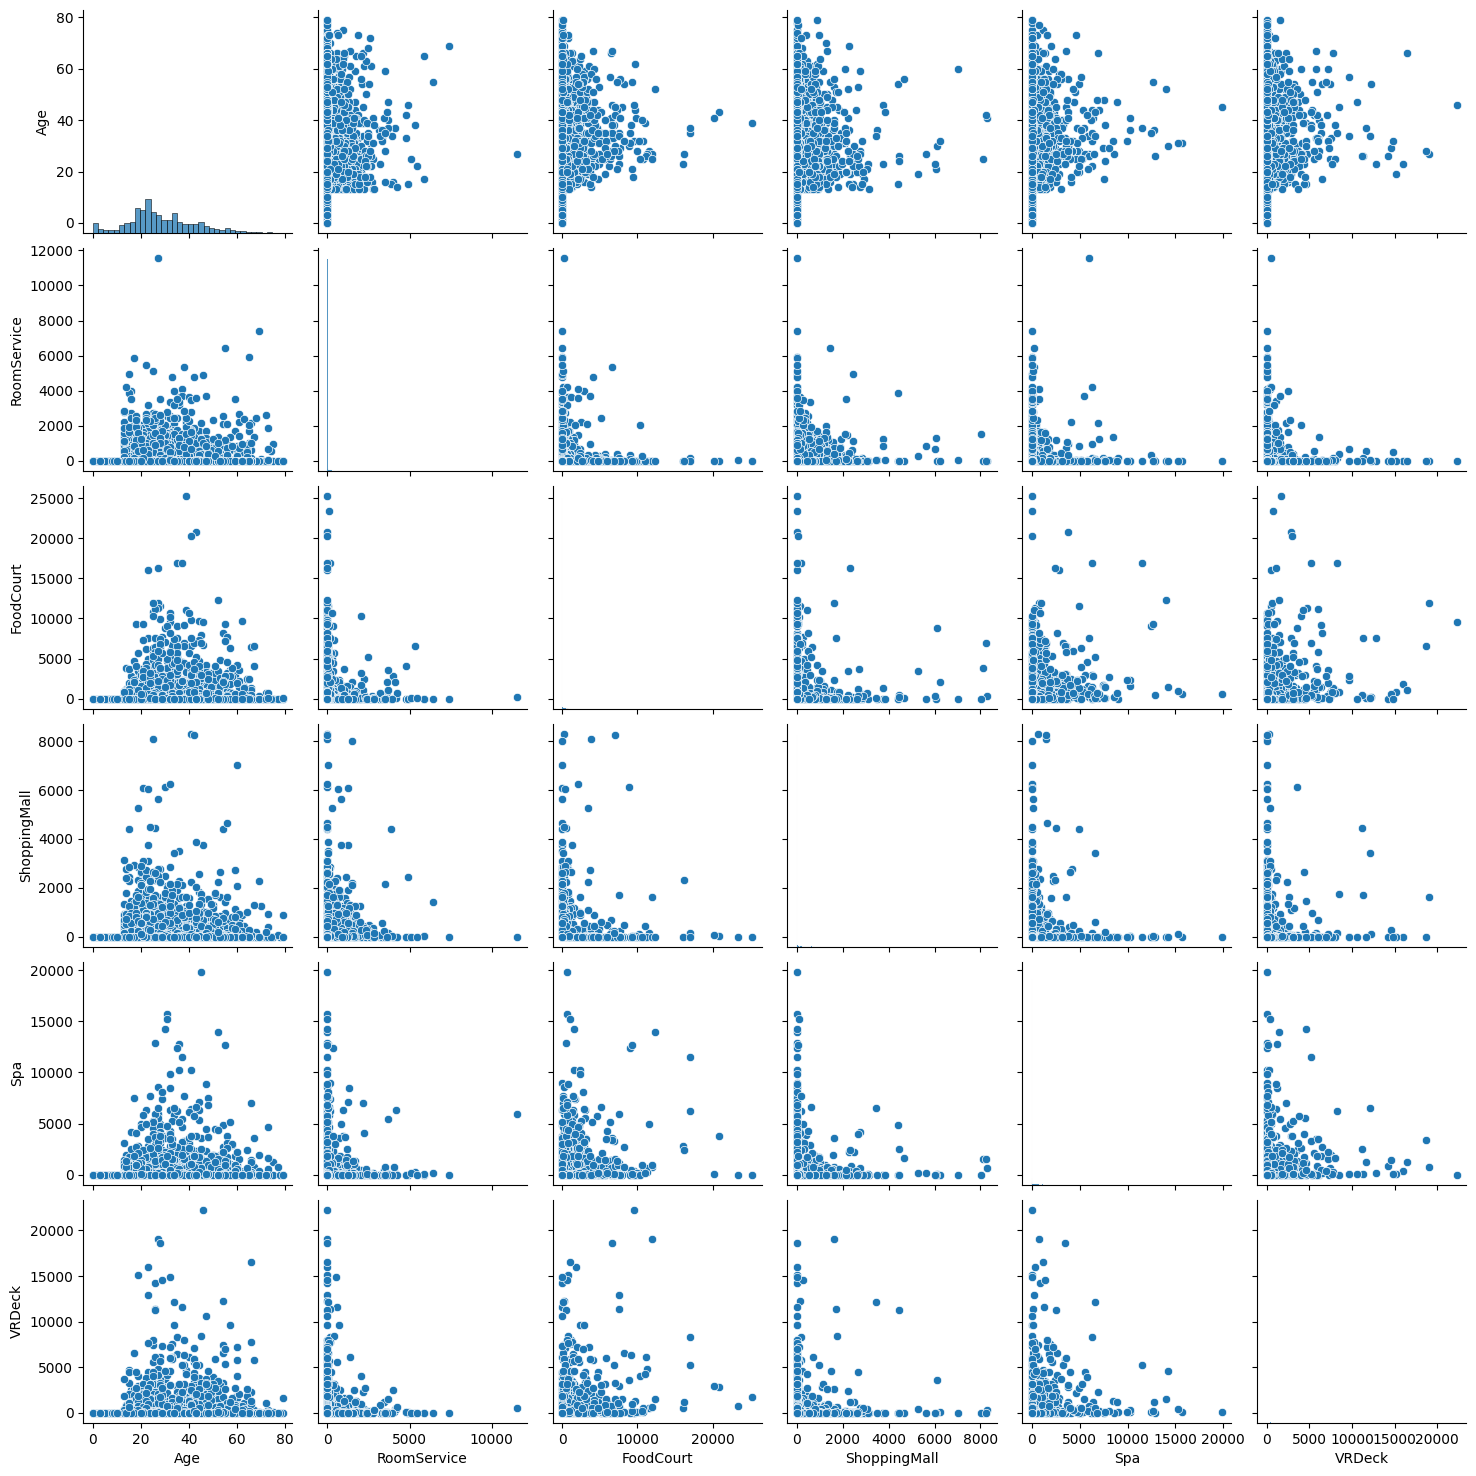

In [166]:
# Explaining the selected columns in terms of pair plots
sns.pairplot(dropped_test_df)

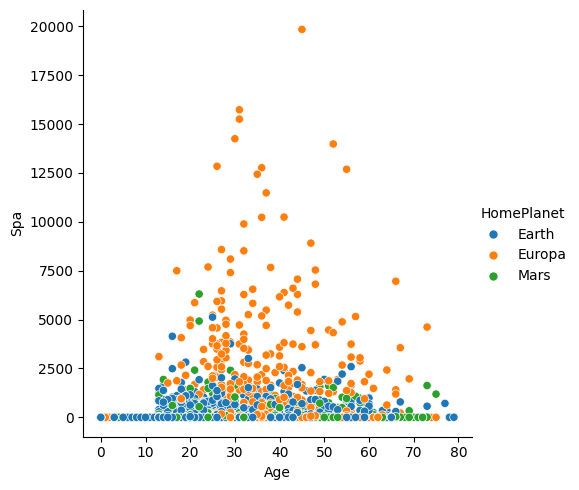

In [167]:
# relplot shows the relation between the variables
sns.relplot(x='Age', y='Spa', hue='HomePlanet', data=test_df)

<Axes: xlabel='Age', ylabel='Count'>

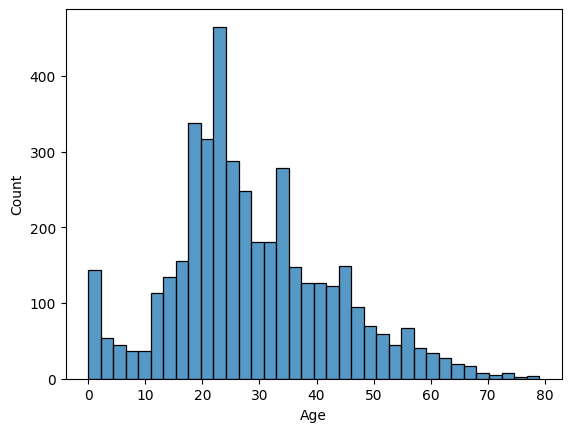

In [168]:
# Histplot visualization
sns.histplot(dropped_test_df['Age'])

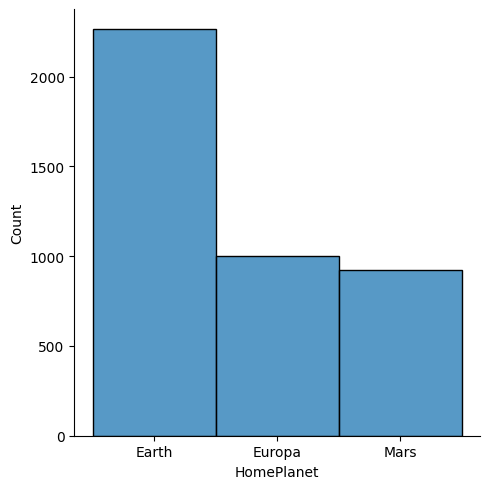

In [169]:
# displot visualization
sns.displot(dropped_test_df['HomePlanet'])

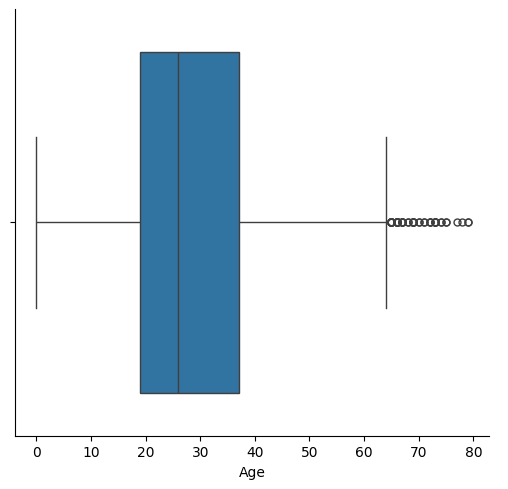

In [170]:
# Categorical plot
sns.catplot(x='Age', kind='box', data=dropped_test_df)

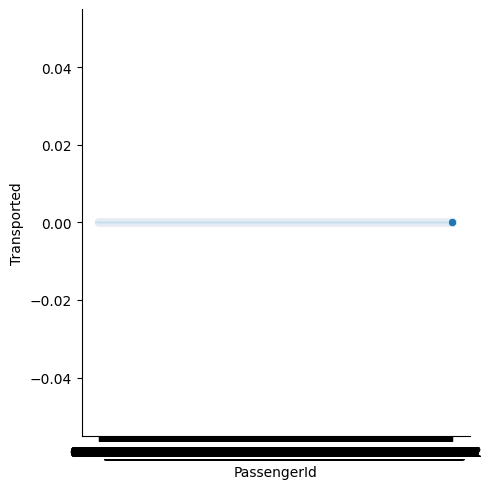

In [171]:
sns.relplot(x='PassengerId', y='Transported', data=sample_submission_df)

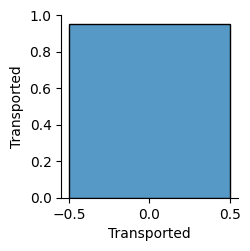

In [172]:
sns.pairplot(sample_submission_df)

<Axes: xlabel='PassengerId', ylabel='Count'>

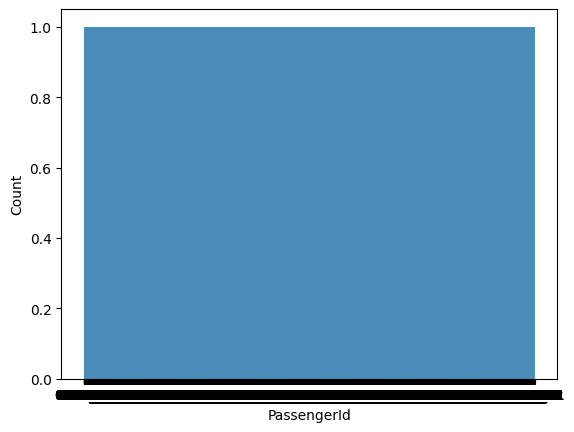

In [173]:
sns.histplot(dropped_test_df['PassengerId'])

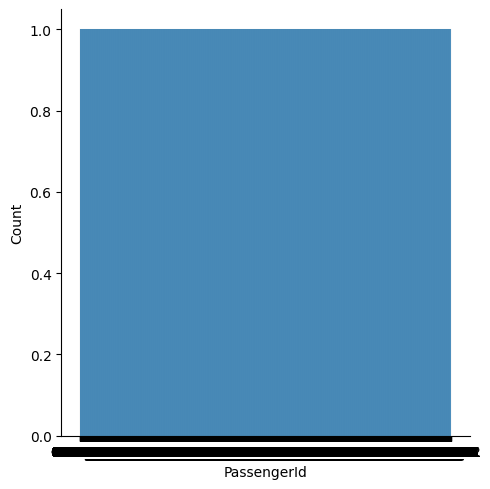

In [174]:
sns.displot(dropped_test_df['PassengerId'])

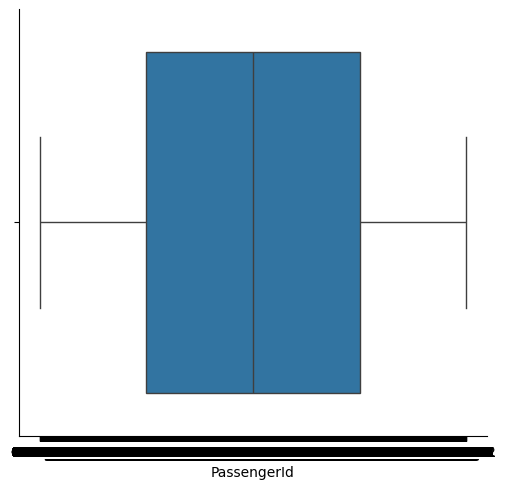

In [175]:
sns.catplot(x='PassengerId', kind='box', data=sample_submission_df)

EDA

In [176]:
pd.pivot_table(data=train_df, index=['HomePlanet'], aggfunc={'Transported': np.mean})

,Transported
HomePlanet,
Earth,0.423946
Europa,0.658846
Mars,0.523024


In [178]:
train_df['Transported'].unique()
# features
X = train_df.drop(columns = ['PassengerId', 'Name',
                                 'Cabin', 'Transported'])

# target (set as integer rather than boolean)
y = train_df['Transported'].astype(int).values

In [179]:
# define our categorical and numerical variables
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
                     'Spa', 'VRDeck']

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [181]:
# setup preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('onehotencoder', OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
# apply our preprocessor to our training and testing feature data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [184]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [185]:
# convert training and testing sets to tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)

In [186]:
# define articial neural network (ANN)

class SpaceshipTitanic(nn.Module):

    def __init__(self):
        # instantiate the parent class
        super(SpaceshipTitanic, self).__init__()

        # setup input layer
        self.input_layer = nn.Linear(X_train.shape[1], 20)

        # setup the first hidden layer
        self.layer2 = nn.Linear(20, 15)

        # setup a second hidden layer
        self.layer3 = nn.Linear(15, 12)

        # setup a third hidden layer
        self.layer4 = nn.Linear(12, 6)

        # setup the output layer
        self.output_layer = nn.Linear(6, 1)

        # define activation functions
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    # setup forward method
    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.sigmoid(self.output_layer(x))

        return x


In [187]:
SpaceshipTitanic()

SpaceshipTitanic(
  (input_layer): Linear(in_features=16, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=12, bias=True)
  (layer4): Linear(in_features=12, out_features=6, bias=True)
  (output_layer): Linear(in_features=6, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [188]:
# setup our model
model = SpaceshipTitanic()

# run the model

# how do we define loss function?
criterion = nn.BCELoss()

# how do we define optimizer
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# how many times to run our data through the ANN
epochs = 2500

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    # as loss decreases the model is better fit to the training data
    if (epoch +1) % 100 == 0:
        print(f"Epoch {epoch + 1}, Loss: {round(loss.item(), 4)}")

Epoch 100, Loss: 0.6928
Epoch 200, Loss: 0.6915
Epoch 300, Loss: 0.6883
Epoch 400, Loss: 0.6727
Epoch 500, Loss: 0.5345
Epoch 600, Loss: 0.4764
Epoch 700, Loss: 0.4563
Epoch 800, Loss: 0.4458
Epoch 900, Loss: 0.4401
Epoch 1000, Loss: 0.4365
Epoch 1100, Loss: 0.4339
Epoch 1200, Loss: 0.4316
Epoch 1300, Loss: 0.4295
Epoch 1400, Loss: 0.428
Epoch 1500, Loss: 0.4268
Epoch 1600, Loss: 0.4258
Epoch 1700, Loss: 0.4249
Epoch 1800, Loss: 0.4241
Epoch 1900, Loss: 0.4234
Epoch 2000, Loss: 0.4227
Epoch 2100, Loss: 0.4222
Epoch 2200, Loss: 0.4217
Epoch 2300, Loss: 0.4212
Epoch 2400, Loss: 0.4207
Epoch 2500, Loss: 0.4203


In [189]:
# evaluate our model with an accuracy score
from sklearn.metrics import accuracy_score

# put our model in evaluation mode to evaluate
model.eval()

with torch.no_grad():
    y_pred = model(X_test).squeeze()
    predicted = (y_pred >= 0.5).long()

accuracy = accuracy_score(y_test, predicted.numpy())
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8056354226566993


In [191]:
sample_submission_df.head(3)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False


In [193]:
# make predictions on our testing_data
eval_data = test_df.drop(columns = ['PassengerId','Name','Cabin'])

eval_data = preprocessor.transform(eval_data)

eval_data = torch.tensor(eval_data, dtype = torch.float32)

model.eval()
with torch.no_grad():
    predicted_probs = model(eval_data).squeeze()
    predictions = (predicted_probs >= 0.5).long()

# set our predictions to boolean values from integers
predictions = [bool(item) for item in predictions.tolist()]

# create the submission dataframe
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                             'Transported' : predictions})

# create a CSV file from the dataframe
submission_df.to_csv('submission.csv', index = False)

In [195]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.9 MB/s eta 0:00:00
